## Installing and importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing the reviews

In [ ]:
disneyplus = pd.read_csv('DisneyPlus_Google_Play.csv')

In [ ]:
disneyplus

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
209181,209181,99bd5530-071c-46ae-8d65-f396a788805e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney! Awesome app!,5,6,1.0.0,2019-09-12 06:17:19,NaN,NaN
209182,209182,866c928f-7d71-4b48-bb57-08dd93d3364e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Crashes once when switching over to kids profi...,1,5,1.0.0,2019-09-12 06:08:19,Hello Rocco. Thanks for the feedback. Can you ...,2019-09-21 17:32:41
209183,209183,1c1eaa4c-c4c3-4742-8c77-e8af41458549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney so I'm very happy with this (ver...,5,3,1.0.0,2019-09-12 05:31:04,NaN,NaN
209184,209184,c4d3a462-ac13-4fef-b21c-12e86223e1e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's the best app streaming,5,1,1.0.0,2019-09-12 04:52:26,NaN,NaN


In [ ]:
disneyplus.dtypes

Unnamed: 0               int64
reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

## Labeling reviews basing on the score

In [ ]:
disneyplus['label'] = 'neutral'

high_mask = disneyplus['score'] >= 4
disneyplus['label'].loc[high_mask] = 'positive'

low_mask = disneyplus['score'] <= 2
disneyplus['label'].loc[low_mask] = 'negative'

<ipython-input-5-5144d940244c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disneyplus['label'].loc[high_mask] = 'positive'
<ipython-input-5-5144d940244c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disneyplus['label'].loc[low_mask] = 'negative'


In [ ]:
disneyplus

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,label
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN,positive
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN,negative
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN,positive
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN,positive
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
209181,209181,99bd5530-071c-46ae-8d65-f396a788805e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney! Awesome app!,5,6,1.0.0,2019-09-12 06:17:19,NaN,NaN,positive
209182,209182,866c928f-7d71-4b48-bb57-08dd93d3364e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Crashes once when switching over to kids profi...,1,5,1.0.0,2019-09-12 06:08:19,Hello Rocco. Thanks for the feedback. Can you ...,2019-09-21 17:32:41,negative
209183,209183,1c1eaa4c-c4c3-4742-8c77-e8af41458549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney so I'm very happy with this (ver...,5,3,1.0.0,2019-09-12 05:31:04,NaN,NaN,positive
209184,209184,c4d3a462-ac13-4fef-b21c-12e86223e1e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's the best app streaming,5,1,1.0.0,2019-09-12 04:52:26,NaN,NaN,positive


## Adding a column with the trimester of publication

In [ ]:
disneyplus['at'] = pd.to_datetime(disneyplus['at'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
disneyplus.dtypes

Unnamed: 0                       int64
reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt                       object
label                           object
dtype: object

In [ ]:
disneyplus['year'] =  disneyplus['at'].apply(lambda x: x.year)
disneyplus['month'] =  disneyplus['at'].apply(lambda x: x.month)

In [ ]:
disneyplus['quarter'] = (disneyplus['month'] / 3).apply(math.ceil)

In [ ]:
disneyplus['year'] = disneyplus['year'].astype(str)
disneyplus['month'] = disneyplus['month'].astype(str)
disneyplus['quarter'] = disneyplus['quarter'].astype(str)
disneyplus['quarter'] = disneyplus['year'].apply(lambda x: x[-2:]) + ' ' + disneyplus['quarter'] + 'Q'

In [ ]:
disneyplus

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,label,year,month,quarter
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN,positive,2023,4,23 2Q
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN,negative,2023,4,23 2Q
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN,positive,2023,4,23 2Q
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN,positive,2023,4,23 2Q
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN,positive,2023,4,23 2Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209181,209181,99bd5530-071c-46ae-8d65-f396a788805e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney! Awesome app!,5,6,1.0.0,2019-09-12 06:17:19,NaN,NaN,positive,2019,9,19 3Q
209182,209182,866c928f-7d71-4b48-bb57-08dd93d3364e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Crashes once when switching over to kids profi...,1,5,1.0.0,2019-09-12 06:08:19,Hello Rocco. Thanks for the feedback. Can you ...,2019-09-21 17:32:41,negative,2019,9,19 3Q
209183,209183,1c1eaa4c-c4c3-4742-8c77-e8af41458549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney so I'm very happy with this (ver...,5,3,1.0.0,2019-09-12 05:31:04,NaN,NaN,positive,2019,9,19 3Q
209184,209184,c4d3a462-ac13-4fef-b21c-12e86223e1e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's the best app streaming,5,1,1.0.0,2019-09-12 04:52:26,NaN,NaN,positive,2019,9,19 3Q


## Plotting the counter of positive/neutral/negative comments over time

In [ ]:
aggregated_reviews = disneyplus.groupby(['label', 'quarter']).count()

In [ ]:
aggregated_reviews

Unnamed: 0  reviewId  userName  userImage  content  score  \
label    quarter                                                              
negative 19 3Q            63        63        63         63       63     63   
         19 4Q         11041     11041     11041      11041    11041  11041   
         20 1Q          4516      4516      4516       4516     4516   4516   
         20 2Q          3656      3656      3656       3656     3656   3656   
         20 3Q          2863      2863      2863       2863     2863   2863   
         20 4Q          4196      4196      4196       4196     4196   4196   
         21 1Q          6501      6501      6501       6501     6501   6501   
         21 2Q          4520      4520      4519       4520     4520   4520   
         21 3Q          5782      5782      5782       5782     5782   5782   
         21 4Q          4401      4401      4401       4401     4401   4401   
         22 1Q          4165      4165      4165       4165     4165   4165   
         22 2Q          4781      4781      4781       4781     4781   4781   
         22 3Q          6659      6659      6659       6659     6659   6659   
         22 4Q          7585      7585      7585       7585     7585   7585   
         23 1Q          4505      4505      4505       4505     4505   4505   
         23 2Q           128       128       128        128      128    128   
neutral  19 3Q            38        38        38         38       38     38   
         19 4Q          3365      3365      3365       3365     3365   3365   
         20 1Q          1234      1234      1234       1234     1234   1234   
         20 2Q          1189      1189      1189       1189     1189   1189   
         20 3Q           736       736       736        736      736    736   
         20 4Q           944       944       944        944      944    944   
         21 1Q          1218      1218      1218       1218     1218   1218   
         21 2Q          1068      1068      1068       1068     1068   1068   
         21 3Q          1009      1009      1009       1009     1009   1009   
         21 4Q           742       742       742        742      742    742   
         22 1Q           557       557       557        557      557    557   
         22 2Q           687       687       687        687      687    687   
         22 3Q           799       799       799        799      799    799   
         22 4Q           837       837       837        837      837    837   
         23 1Q           656       656       656        656      656    656   
         23 2Q            21        21        21         21       21     21   
positive 19 3Q            81        81        81         81       81     81   
         19 4Q         16807     16807     16807      16807    16805  16807   
         20 1Q         11417     11417     11417      11417    11416  11417   
         20 2Q         14083     14083     14083      14083    14082  14083   
         20 3Q          8225      8225      8225       8225     8225   8225   
         20 4Q         12290     12290     12290      12290    12290  12290   
         21 1Q         13720     13720     13720      13720    13720  13720   
         21 2Q          9927      9927      9927       9927     9927   9927   
         21 3Q          5818      5818      5818       5818     5818   5818   
         21 4Q          4979      4979      4979       4979     4979   4979   
         22 1Q          3841      3841      3841       3841     3841   3841   
         22 2Q          3134      3134      3134       3134     3134   3134   
         22 3Q          5720      5720      5720       5720     5720   5720   
         22 4Q          4865      4865      4865       4865     4865   4865   
         23 1Q          3642      3642      3642       3642     3642   3642   
         23 2Q           175       175       175        175      175    175   

                  thumbsUpCount  reviewCreatedVersion     at  reply

In [ ]:
positive = aggregated_reviews.loc['positive'].reset_index()

In [ ]:
neutral = aggregated_reviews.loc['neutral'].reset_index()

In [ ]:
negative = aggregated_reviews.loc['negative'].reset_index()

In [ ]:
negative

,quarter,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month
0,19 3Q,63,63,63,63,63,63,63,60,63,47,47,63,63
1,19 4Q,11041,11041,11041,11041,11041,11041,11041,9112,11041,2612,2612,11041,11041
2,20 1Q,4516,4516,4516,4516,4516,4516,4516,3526,4516,633,633,4516,4516
3,20 2Q,3656,3656,3656,3656,3656,3656,3656,2879,3656,24,24,3656,3656
4,20 3Q,2863,2863,2863,2863,2863,2863,2863,2186,2863,9,9,2863,2863
5,20 4Q,4196,4196,4196,4196,4196,4196,4196,3366,4196,7,7,4196,4196
6,21 1Q,6501,6501,6501,6501,6501,6501,6501,5162,6501,11,11,6501,6501
7,21 2Q,4520,4520,4519,4520,4520,4520,4520,3705,4520,9,9,4520,4520
8,21 3Q,5782,5782,5782,5782,5782,5782,5782,4869,5782,5,5,5782,5782
9,21 4Q,4401,4401,4401,4401,4401,4401,4401,3664,4401,6,6,4401,4401


In [ ]:
positive = positive[(positive.quarter != '19 3Q') & (positive.quarter != '23 2Q')]

In [ ]:
neutral = neutral[(neutral.quarter != '19 3Q') & (neutral.quarter != '23 2Q')]

In [ ]:
negative = negative[(negative.quarter != '19 3Q') & (negative.quarter != '23 2Q')]

In [ ]:
negative

,quarter,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,year,month
1,19 4Q,11041,11041,11041,11041,11041,11041,11041,9112,11041,2612,2612,11041,11041
2,20 1Q,4516,4516,4516,4516,4516,4516,4516,3526,4516,633,633,4516,4516
3,20 2Q,3656,3656,3656,3656,3656,3656,3656,2879,3656,24,24,3656,3656
4,20 3Q,2863,2863,2863,2863,2863,2863,2863,2186,2863,9,9,2863,2863
5,20 4Q,4196,4196,4196,4196,4196,4196,4196,3366,4196,7,7,4196,4196
6,21 1Q,6501,6501,6501,6501,6501,6501,6501,5162,6501,11,11,6501,6501
7,21 2Q,4520,4520,4519,4520,4520,4520,4520,3705,4520,9,9,4520,4520
8,21 3Q,5782,5782,5782,5782,5782,5782,5782,4869,5782,5,5,5782,5782
9,21 4Q,4401,4401,4401,4401,4401,4401,4401,3664,4401,6,6,4401,4401
10,22 1Q,4165,4165,4165,4165,4165,4165,4165,3414,4165,1,1,4165,4165


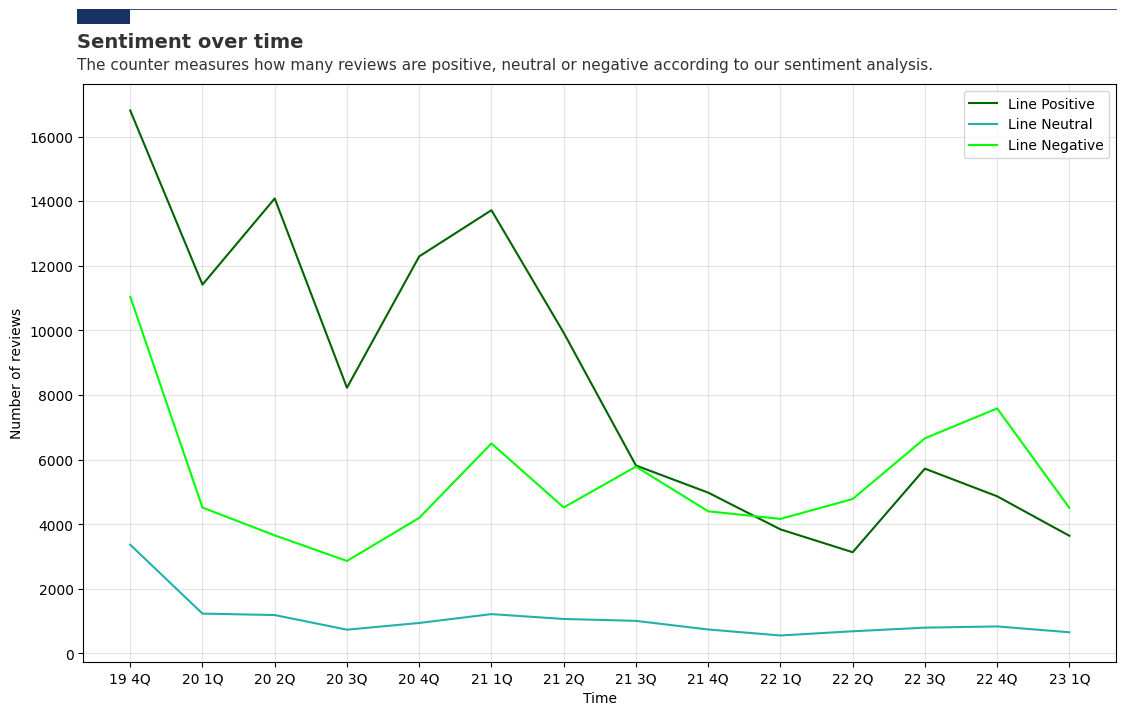

In [ ]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# create the line graph
plt.plot(positive.quarter, positive.reviewId, label='Line Positive', color='darkgreen')
plt.plot(positive.quarter, neutral.reviewId, label='Line Neutral', color='lightseagreen')
plt.plot(positive.quarter, negative.reviewId, label='Line Negative', color='lime')
# Create the grid 
ax.grid(which='major', axis='x', color='#DAD8D7', alpha=0.7, zorder=1)
ax.grid(which='major', axis='y', color='#DAD8D7', alpha=0.7, zorder=1)
# set the title, legend, and axis labels
plt.xlabel('Time')
plt.ylabel('Number of reviews')
plt.legend()
ax.text(x=0.12, y=0.93, s='Sentiment over time', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The counter measures how many reviews are positive, neutral or negative according to our sentiment analysis.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#1A3263', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#1A3263', linewidth=.6)

# display the graph
plt.show()

## Plotting the average score over time


In [ ]:
aggregated_reviews2 = disneyplus.groupby(['quarter']).score.mean()

In [ ]:
aggregated_reviews2 = aggregated_reviews2[(aggregated_reviews2.index != '19 3Q') & (aggregated_reviews2.index != '23 2Q')]

In [ ]:
aggregated_reviews2

quarter
19 4Q    3.345914
20 1Q    3.777247
20 2Q    4.047390
20 3Q    3.860707
20 4Q    3.887894
21 1Q    3.639349
21 2Q    3.670448
21 3Q    3.022841
21 4Q    3.115689
22 1Q    2.941025
22 2Q    2.641014
22 3Q    2.862953
22 4Q    2.633025
23 1Q    2.835738
Name: score, dtype: float64

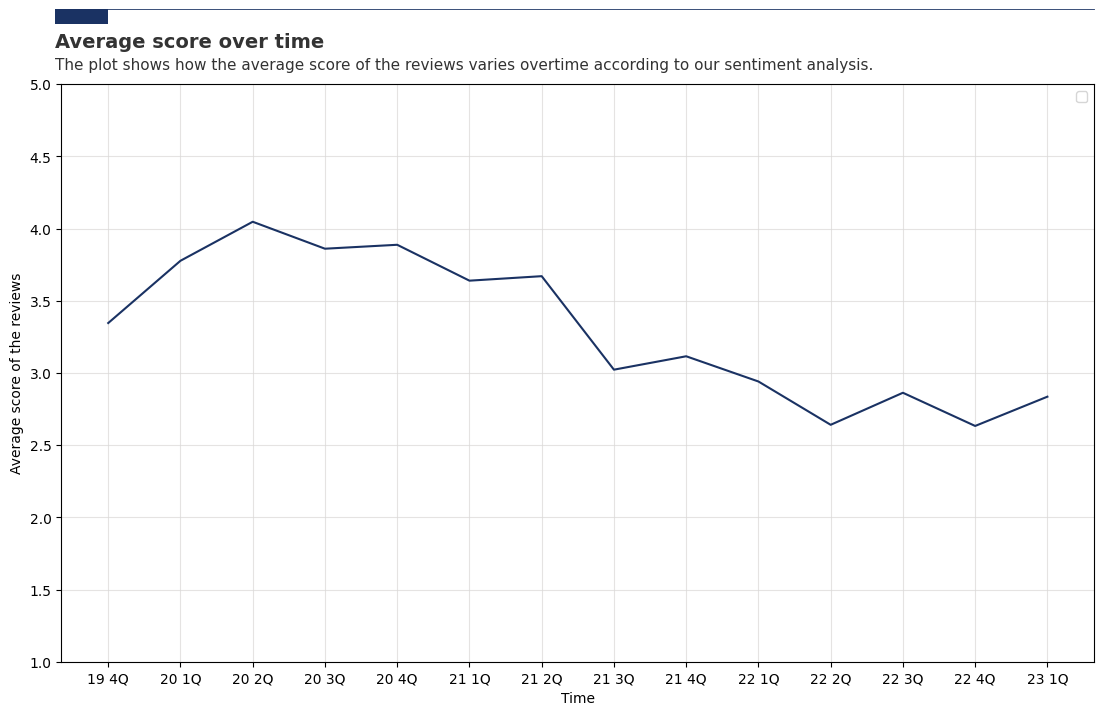

In [ ]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# create the line graph
plt.plot(aggregated_reviews2.index, aggregated_reviews2.values, color='#1A3263')
# Create the grid 
ax.grid(which='major', axis='x', color='#DAD8D7', alpha=0.7, zorder=1)
ax.grid(which='major', axis='y', color='#DAD8D7', alpha=0.7, zorder=1)
ax.set_ylim(1, 5)
# set the title, legend, and axis labels
plt.xlabel('Time')
plt.ylabel('Average score of the reviews')
plt.legend()
ax.text(x=0.12, y=0.93, s='Average score over time', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The plot shows how the average score of the reviews varies overtime according to our sentiment analysis.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#1A3263', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#1A3263', linewidth=.6)

# display the graph
plt.show()

## Plotting average score vs number of subscribers over time

In [ ]:
subscribers = pd.read_csv('Subscribers.csv')
subscribers = subscribers[['quarter','Disney']]
subscribers

,quarter,Disney
0,19 4Q,26
1,20 1Q,34
2,20 2Q,58
3,20 3Q,74
4,20 4Q,87
5,21 1Q,95
6,21 2Q,104
7,21 3Q,116
8,21 4Q,118
9,22 1Q,130


In [ ]:
final_df = pd.merge(aggregated_reviews2, subscribers, on='quarter')
final_df

,quarter,score,Disney
0,19 4Q,3.345914,26
1,20 1Q,3.777247,34
2,20 2Q,4.047390,58
3,20 3Q,3.860707,74
4,20 4Q,3.887894,87
5,21 1Q,3.639349,95
6,21 2Q,3.670448,104
7,21 3Q,3.022841,116
8,21 4Q,3.115689,118
9,22 1Q,2.941025,130


In [ ]:
final_df.rename({'Disney': 'subscribers'}, axis = 1, inplace = True)
final_df

,quarter,score,subscribers
0,19 4Q,3.345914,26
1,20 1Q,3.777247,34
2,20 2Q,4.047390,58
3,20 3Q,3.860707,74
4,20 4Q,3.887894,87
5,21 1Q,3.639349,95
6,21 2Q,3.670448,104
7,21 3Q,3.022841,116
8,21 4Q,3.115689,118
9,22 1Q,2.941025,130


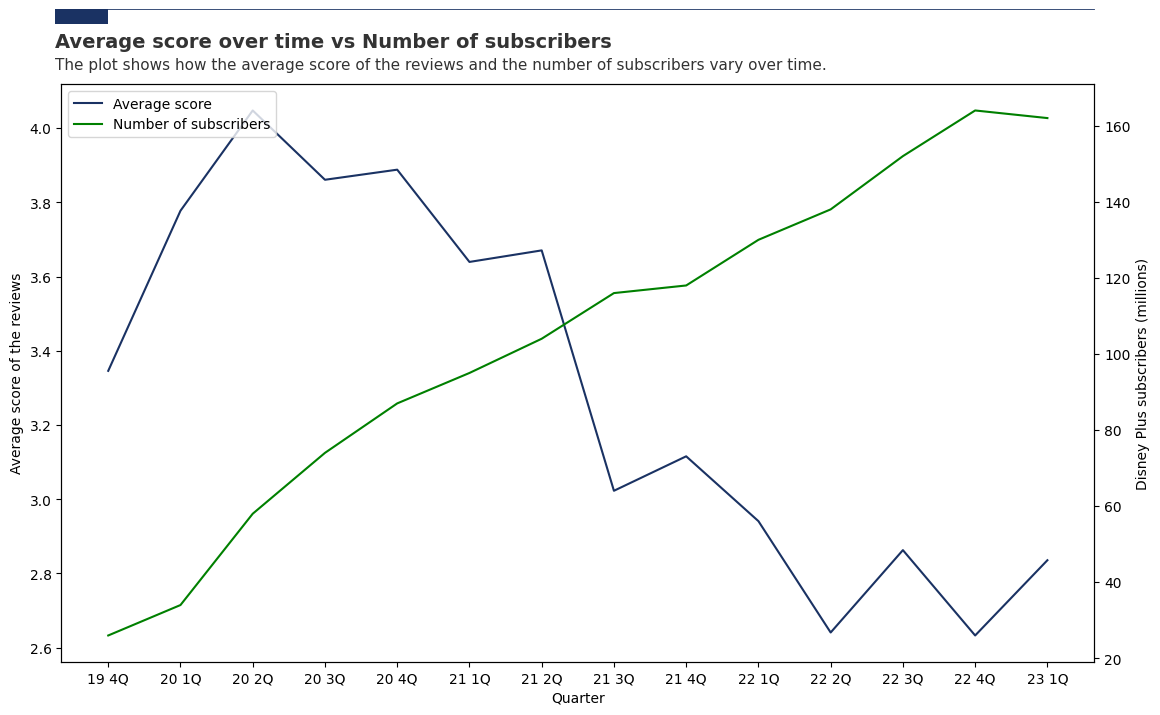

In [ ]:
# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(13.33,7.5), dpi=100)

# Set the x-axis values to the quarters
x = final_df['quarter']

# Plot the score on the first y-axis
ax1.plot(x, final_df['score'], color='#1A3263', label='Average score')
ax1.set_ylabel('Average score of the reviews')

# Create a second y-axis object
ax2 = ax1.twinx()

# Plot the Disney subscribers on the second y-axis
ax2.plot(x, final_df['subscribers'], color='green', label='Number of subscribers')
ax2.set_ylabel('Disney Plus subscribers (millions)')

# Set the x-axis label
ax1.set_xlabel('Quarter')

# Create a legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels, loc='best')

fig.text(x=0.12, y=0.93, s='Average score over time vs Number of subscribers', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
fig.text(x=0.12, y=0.90, s='The plot shows how the average score of the reviews and the number of subscribers vary over time.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
fig.patches.append(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#1A3263', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax1.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#1A3263', linewidth=.6)

# Display the chart
plt.show()